# PROJECT : **Modeling Financial Derivatives Pricing with the Bates Model and Orthogonal Laguerre Polynomials**

**Project Description: Modeling Financial Derivatives Pricing with the Bates Model and Orthogonal Laguerre Polynomials**

**Overview:**
The project aims to develop a comprehensive framework for pricing financial derivatives using advanced mathematical models, specifically the Bates model for stochastic volatility and Orthogonal Laguerre polynomials for efficient approximation of option pricing functions.

**Objectives:**
1. Implement the Bates model: Develop a robust implementation of the Bates model, an extension of the Heston model, to capture the dynamics of asset prices with stochastic volatility and jumps.
2. Orthogonal Laguerre polynomial approximation: Design a module to generate orthogonal Laguerre polynomials, providing a flexible and efficient approach for approximating option pricing functions with improved accuracy and computational efficiency.
3. Integration: Integrate the Bates model and Orthogonal Laguerre polynomials into a unified framework for pricing various financial derivatives, including options, futures, and other complex instruments.
4. Evaluation and validation: Evaluate the performance and accuracy of the proposed framework by comparing the pricing results against benchmark models and empirical data. Validate the effectiveness of Orthogonal Laguerre polynomials in reducing computational complexity while maintaining pricing accuracy.

**Methodology:**
- Bates Model Implementation: Implement the Bates model using Python and numerical libraries such as NumPy and SciPy. Incorporate features such as stochastic volatility, jumps, and correlation between asset returns and volatility.
- Orthogonal Laguerre Polynomial Module: Develop a module to generate orthogonal Laguerre polynomials using PyTorch, enabling efficient computation of option pricing functions with reduced computational complexity.
- Framework Integration: Integrate the Bates model and Orthogonal Laguerre polynomial module into a cohesive pricing framework, allowing for seamless pricing of various financial derivatives.
- Testing and Validation: Conduct rigorous testing and validation of the framework using simulated data, historical market data, and benchmark models. Assess the accuracy, efficiency, and robustness of the proposed approach.

**Expected Outcomes:**
- A versatile framework for pricing financial derivatives using the Bates model and Orthogonal Laguerre polynomials.
- Improved computational efficiency and accuracy compared to traditional pricing methods.
- Insights into the behavior of financial markets and the impact of stochastic volatility and jumps on derivative pricing.

**Conclusion:**
The project aims to advance the field of financial derivatives pricing by leveraging advanced mathematical models and computational techniques. By combining the Bates model with Orthogonal Laguerre polynomials, the proposed framework offers a powerful tool for accurately pricing a wide range of derivatives in dynamic market environments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from statistics import mean 
from statistics import variance
from scipy import optimize
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F
import os
import random
import numpy as np
from collections import deque
from collections import namedtuple

In [2]:
#reading in the data
df = pd.read_csv("C:\\Datasets\\microsoft\\MSFT.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [4]:
import datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
def plot_stock(stock,color,date=df['Date'],df=df):
    fig = plt.figure(figsize=(20,8))
    sns.lineplot(y=df[stock],x=date,color=color)
    plt.title(f"Stock price change for |{stock}")
    plt.show()

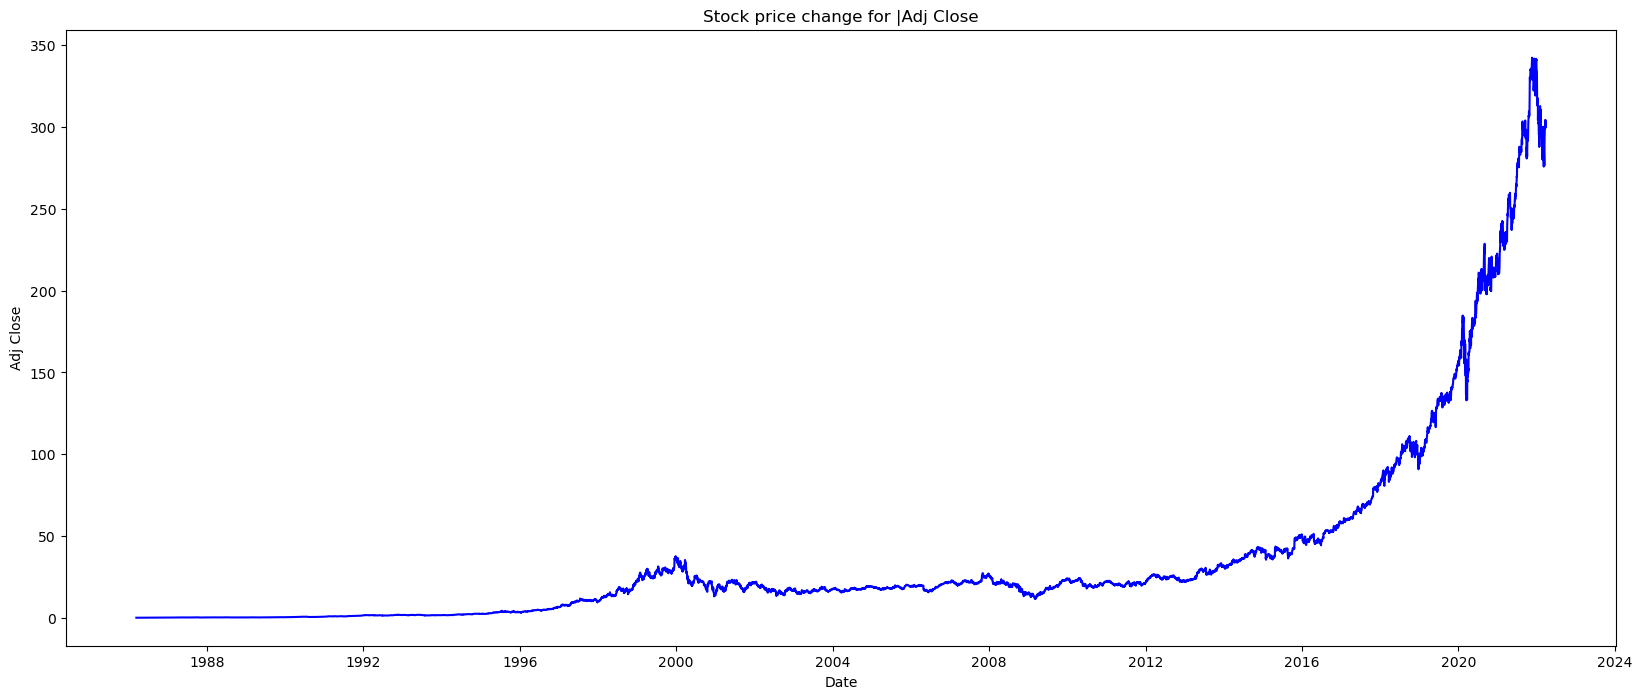

In [6]:
plot_stock('Adj Close','blue')

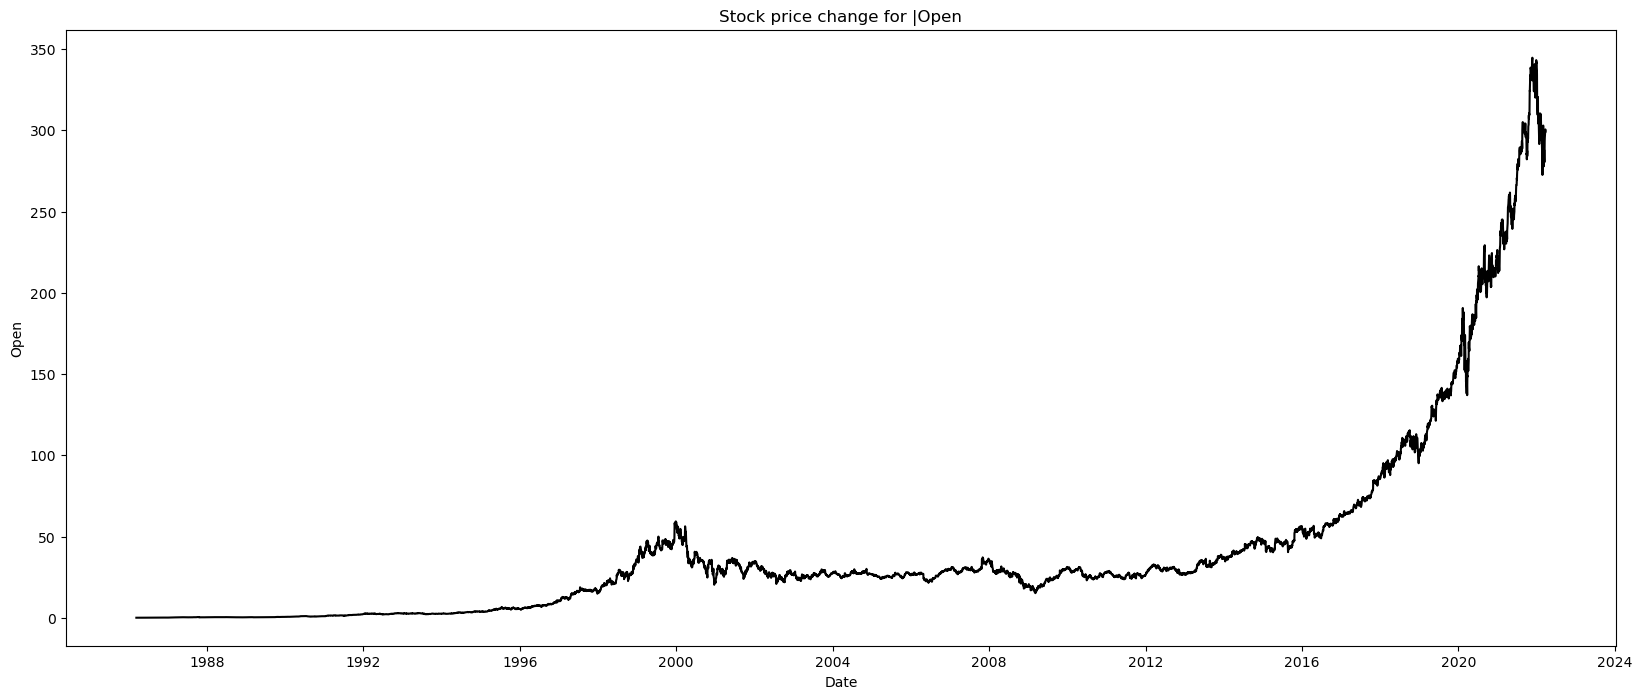

In [7]:
plot_stock('Open','black')

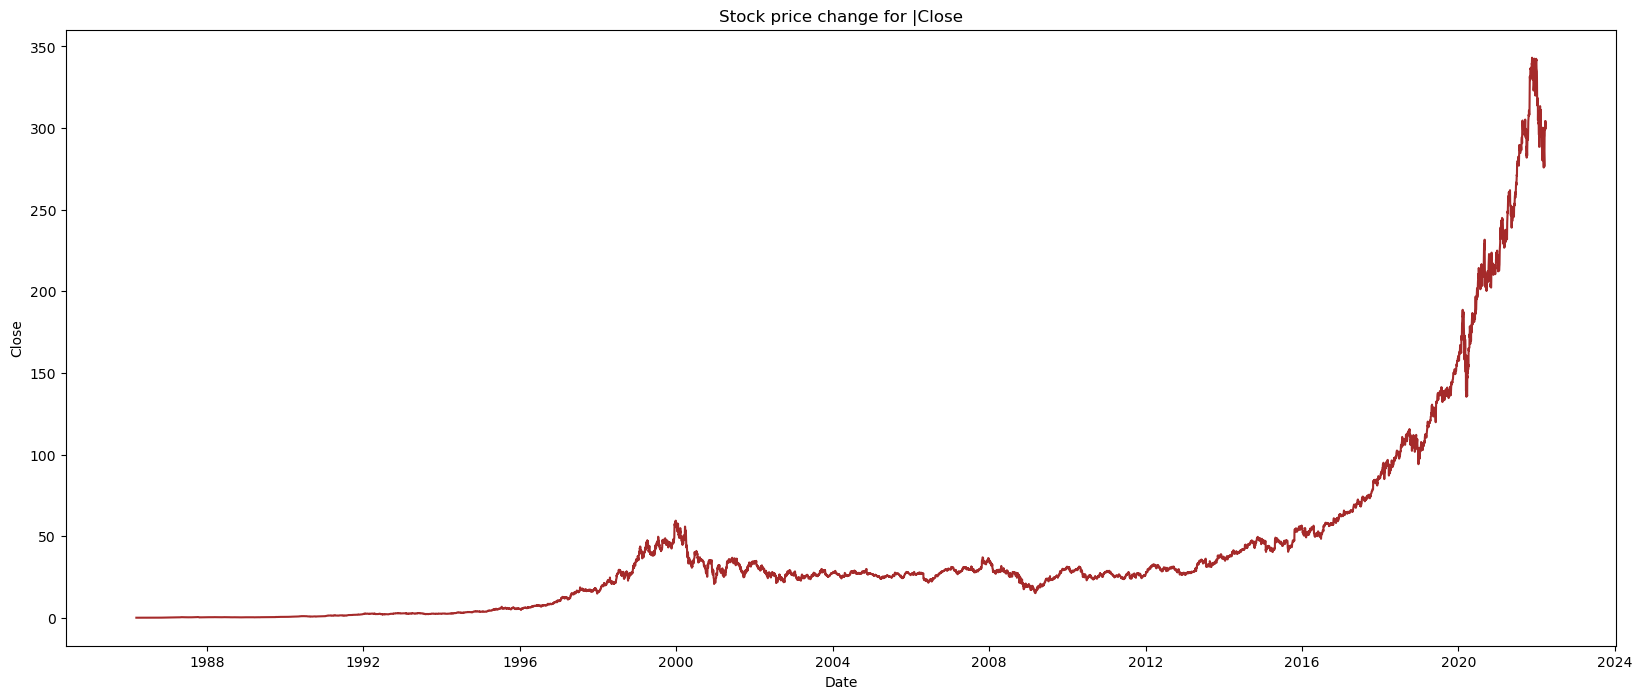

In [8]:
plot_stock('Close','brown')

# The Bates Model :
Bates Model:
This is an extension of the Heston model that includes jumps in asset prices. It incorporates a jump-diffusion process to account for sudden, discontinuous movements in asset prices, which can occur during market events.


Certainly! Here are the Bates Model equation and the Laguerre Polynomial equations formatted with dollar signs for display in a Jupyter notebook:

### Bates Model Equation

The Bates model is a stochastic volatility model that extends the Black-Scholes model to account for stochastic volatility and jumps in asset prices. The model is defined by the following equations:

1. **Stochastic Differential Equation for the Asset Price:**

   $\[
   \frac{{dS_t}}{{S_t}} = (r - \lambda_t \cdot \mu)dt + \sqrt{v_t}dW_t^1
   \]$


2. **Stochastic Differential Equation for the Variance:**

   $\[
   dv_t = \kappa_v(\theta_v - v_t)dt + \sigma_v\sqrt{v_t}dZ_t^2
   \]$

3. **Poisson Process for Jumps:**

   $\[
   N_t \sim \text{Poisson}(\lambda_tdt)
   \]
   \[
   J_{t,i} \sim \text{Log-Normal}(\mu_j - \frac{1}{2}\sigma_j^2, \sigma_j^2) \quad \text{for } i = 1, ..., N_t
   \]$


4. **Total Variance:**

   $\[
   v_t = v_{t-1} + dv_t + \sum_{i=1}^{N_t} J_{t,i}
   \]$
   

Where:
- \( S_t \) is the asset price at time \( t \)
- \( r \) is the risk-free interest rate
- \( \lambda_t \) is the intensity of the Poisson process
- \( \mu \) is the mean jump size
- \( v_t \) is the variance of the asset price at time \( t \)
- \( \kappa_v \) is the rate at which the variance reverts to the long-term mean \( \theta_v \)
- \( \sigma_v \) is the volatility of the variance process
- \( \theta_v \) is the long-term mean variance
- \( dW_t^1 \) and \( dZ_t^2 \) are Wiener processes (Brownian motions)
- \( N_t \) is the number of jumps at time \( t \)
- \( J_{t,i} \) is the jump size at time \( t \) for the \( i \)th jump

### Laguerre Polynomial Equations

The Laguerre polynomials are a set of orthogonal polynomials that can be used to approximate the continuation value function in options pricing. The Laguerre polynomials \( L_k(x) \) are defined by the following recursive formula:

$
\[
L_0(x) = 1
\]$


$
\[
L_1(x) = 1 - x
\]
$



$
\[
L_{k+1}(x) = \frac{{(2k + 1 - x)L_k(x) - kL_{k-1}(x)}}{{k+1}}
\]

$


Where:
- $\( k \) is the degree of the polynomial
- \( x \) is the input variable

The Laguerre polynomials are often used in options pricing models to approximate the continuation value function, which represents the expected payoff from continuing to hold an option.

In [29]:
#HyperParameters for Bates Path/Model
T=1 #time to maturity
r=0.025
K=170
k=5
s=0.02
sigma_v =0.02 #volatility of volatility
kappa_v = 2
theta_v = 0.04 #long term volatility
lamb_0 = 0.5 #initial time intensity
v_0= 0.04 #initial volatility
sigma_lam =0.01
kappa_lam =3
theta_lam =0.060
rho =-0.5711 #correlation between asset return and volatility
jumps =(0.05, 0.02)
time_steps=252
c=0.216
N=1000
LR=1e-4
Npaths = 10000

In [42]:
#Hyperparameters for Bates Model trainer
r = 0.05
kappa = 2.0
theta = 0.04
v0 = 0.04
rho = -0.7
sigma = 0.1
K = 100
input_size = 2
epsilon = 0.1
gamma = 0.99
LR=1e-4
batch_size = 32
episodes = 1000
steps = 100
T = 1

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class OrthogonalLaguerre(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear1(x)

class BatesModel:
    def __init__(self, r, kappa, theta, v0, rho, sigma):
        self.r = r
        self.kappa = kappa
        self.theta = theta
        self.v0 = v0
        self.rho = rho
        self.sigma = sigma

    def simulate(self, S, T, steps):
        dt = T / steps
        size = (len(S), steps + 1)
        prices = np.zeros(size)
        vols = np.zeros(size)
        prices[:, 0] = S
        vols[:, 0] = self.v0
        for t in range(1, steps + 1):
            Z1 = np.random.randn(len(S))
            Z2 = self.rho * Z1 + np.sqrt(1 - self.rho**2) * np.random.randn(len(S))
            vols[:, t] = np.abs(vols[:, t - 1] + self.kappa * (self.theta - vols[:, t - 1]) * dt +
                                 self.sigma * np.sqrt(vols[:, t - 1]) * np.sqrt(dt) * Z2)
            prices[:, t] = prices[:, t - 1] * np.exp((self.r - 0.5 * vols[:, t - 1]) * dt +
                                                      np.sqrt(vols[:, t - 1]) * np.sqrt(dt) * Z1)
        return prices, vols


# BATES SIMULATION PATH 

In [44]:
import numpy as np

def bates_paths(S, T, r, kappa_v, theta_v, v_0, sigma_v, kappa_lam, theta_lam, lamb_0, sigma_lam, rho, jumps, steps, Npaths):
    """Args: 
    This function simulates paths for the Bates model, where `kappa_v`, `theta_v`, `v_0`, 
    `sigma_v` are parameters for the stochastic volatility process, 
`kappa_lam`, `theta_lam`, `lamb_0`, `sigma_lam` are parameters for the jump intensity process, `rho` is
the correlation between the Wiener processes, `jumps` is a tuple containing the mean and standard deviation of the 
jump size distribution, `steps` is the number of time steps, and `Npaths` is the number of paths to simulate.

Returns: 
        prices, sigs, lambdas
 """
    
    dt = T / steps
    size = (Npaths, steps + 1)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    lambdas = np.zeros(size)
    S_t = S
    v_t = v_0
    lambda_t = lamb_0
    prices[:, 0] = S_t
    sigs[:, 0] = v_t
    lambdas[:, 0] = lambda_t
    for t in range(1, steps + 1):
        WT = np.random.multivariate_normal(np.array([0, 0, 0]),
                                            cov=np.array([[1, rho, 0], [rho, 1, 0], [0, 0, 1]]),
                                            size=Npaths) * np.sqrt(dt)

        S_t = S_t * (np.exp((r - 0.5 * v_t) * dt + np.sqrt(v_t) * WT[:, 0]))

        v_t = np.abs(v_t + kappa_v * (theta_v - v_t) * dt + sigma_v * np.sqrt(v_t) * WT[:, 1])

        lambda_t = lambda_t + kappa_lam * (theta_lam - lambda_t) * dt + sigma_lam * np.sqrt(lambda_t) * WT[:, 2]

        Nt = np.random.poisson(lambda_t * dt, size=Npaths)
        jumps_t = np.sum(np.random.normal(jumps[0], jumps[1], size=(Npaths, np.max(Nt))), axis=1)

        S_t = S_t * np.exp(jumps_t)

        prices[:, t] = S_t
        sigs[:, t] = v_t
        lambdas[:, t] = lambda_t

    return prices


# BATES TRAINER  AND AGENT

In [45]:
model=BatesModel(r=r,  kappa=kappa ,theta=theta, v0=v0, rho=rho, sigma=sigma)
class BatesAgent:
    def __init__(self, model, epsilon, gamma, lr):
        self.model = model
        self.epsilon = epsilon
        self.gamma = gamma
        self.optimizer = optim.Adam(model.parameters(), lr=lr)
        self.memory = deque(maxlen=1000)
        self.criterion = nn.MSELoss()

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, 2)
        else:
            return np.argmax(self.model(torch.FloatTensor(state)).detach().numpy())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def train_step(self, batch_size):
        if len(self.memory) < batch_size:
            return
        batch = np.array(random.sample(self.memory, batch_size))
        states, actions, rewards, next_states, dones = batch[:, 0], batch[:, 1], batch[:, 2], batch[:, 3], batch[:, 4]
        states = torch.FloatTensor(np.stack(states))
        next_states = torch.FloatTensor(np.stack(next_states))
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)
        actions = torch.LongTensor(actions)

        current_q = self.model(states).gather(1, actions.unsqueeze(1))
        next_q = self.model(next_states).max(dim=1)[0].detach()
        target_q = rewards + self.gamma * next_q * (1 - dones)
        loss = self.criterion(current_q.squeeze(), target_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

class Trainer:
    def __init__(self, agent, bates_model):
        self.agent = agent
        self.bates_model = bates_model

    def train(self, data, T, steps, episodes, batch_size):
        for _ in range(episodes):
            S = np.array(data)
            S, vols = self.bates_model.simulate(S, T, steps)
            for t in range(1, steps):
                state = np.array([S[:, t], vols[:, t]]).T
                action = self.agent.get_action(state)
                next_state = np.array([S[:, t + 1], vols[:, t + 1]]).T
                reward = np.sum(np.maximum(K - S[:, t], 0) * action)
                done = t == steps - 1
                self.agent.remember(state, action, reward, next_state, done)
                self.agent.train_step(batch_size)


In [46]:
theta_v = 0.045
S=df['Adj Close'].iloc[-101]
data=bates_paths(S, T, r, kappa_v, theta_v, v_0, sigma_v, kappa_lam, theta_lam, lamb_0, sigma_lam, rho, jumps, 100, 10000)

In [47]:
def plot_bates_model(data):
    plt.figure(figsize=(20,8))
    # Plot each path
    for i in range(len(data)):
        plt.plot(data[i])

    # Add labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Asset Price')
    plt.title('Simulated Asset Price Paths using Bates Model')
    #plt.legend()
    plt.show()
T=100

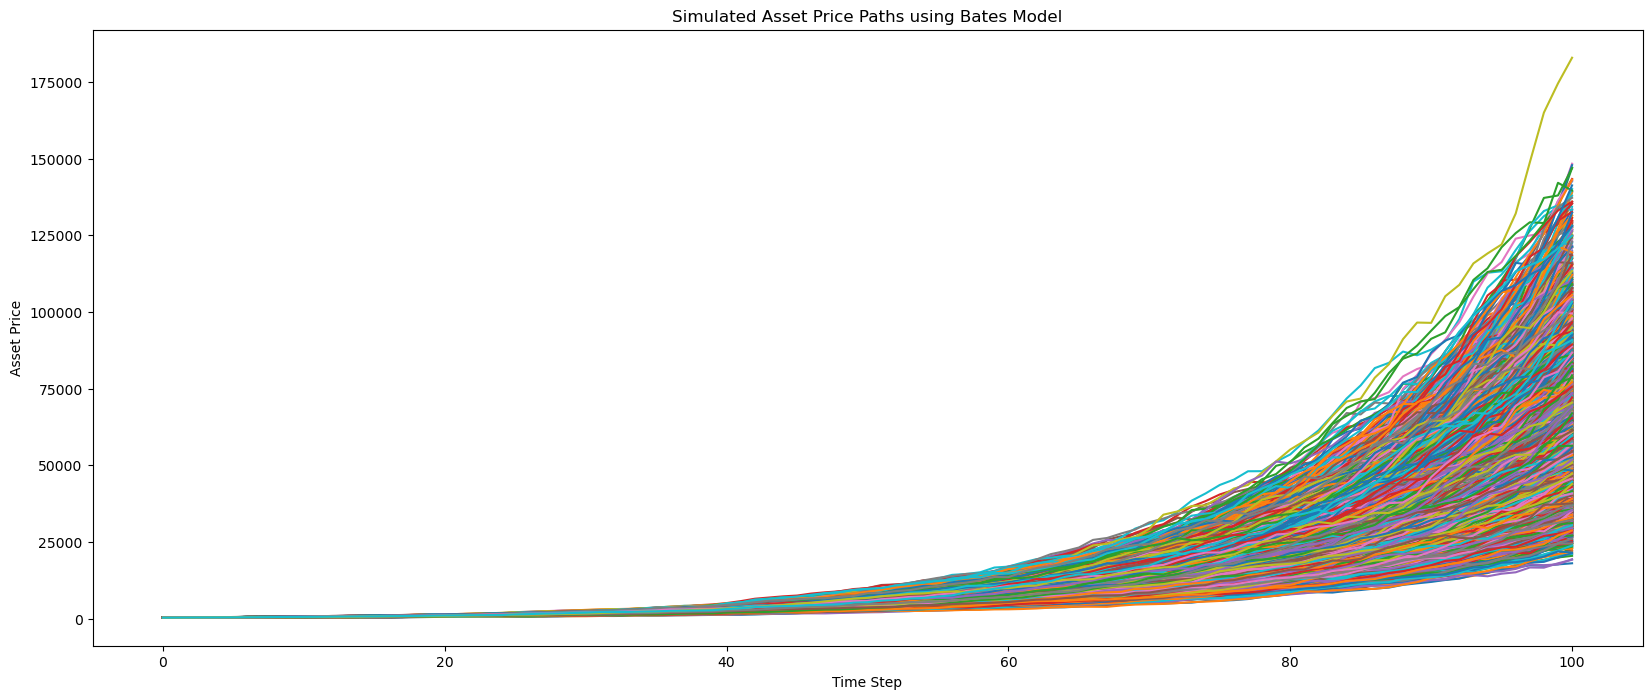

In [48]:
plot_bates_model(data)

In [49]:
class Option:
    def play_step(self,S,t, action):
        #The option is excuted by the holder ot at the maturity, when we get a reward of the reurn, otherwise the reward is 0
        reward = 0
        done = (action==1)
        if done or (t == T-1):
            reward = max(K-S,0)
        return reward, done

In [ ]:
bates_model = BatesModel(r, kappa, theta, v0, rho, sigma)
model = OrthogonalLaguerre(input_size)
agent = BatesAgent(model=model, epsilon=epsilon, gamma=gamma, lr=0.001)
trainer = Trainer(agent, bates_model)
trainer.train(data, T, steps, episodes, batch_size)
test(data, T, steps, agent)

In [65]:
r = 0.05
kappa = 2.0
theta = 0.04
v0 = 0.04
rho = -0.7
sigma = 0.1
K = 100
input_size = 2
epsilon = 0.1
gamma = 0.99
lr = 0.001
batch_size = 32
episodes = 1000
steps = 100
T = 1

In [ ]:
test_data=df['Adj Close'].values[-200:]
model = model
t=155
#model.load_state_dict(torch.load("./model/model.pth"))
#model.eval()
agent = BatesAgent(model)
game = Option()
for t in range(len(test_data)-10):
    action=agent.get_action(test_data[t],t)
    reward, done = game.play_step(test_data[t],t,action)
    if done:
        print("The option was exercised at step ", t, " and reward was", round(reward,2))
        break
if not done:
    reward, done = game.play_step(len(test_data),len(test_data),1)
    print("The option was exercised at its maturity and reward was", round(reward,2))

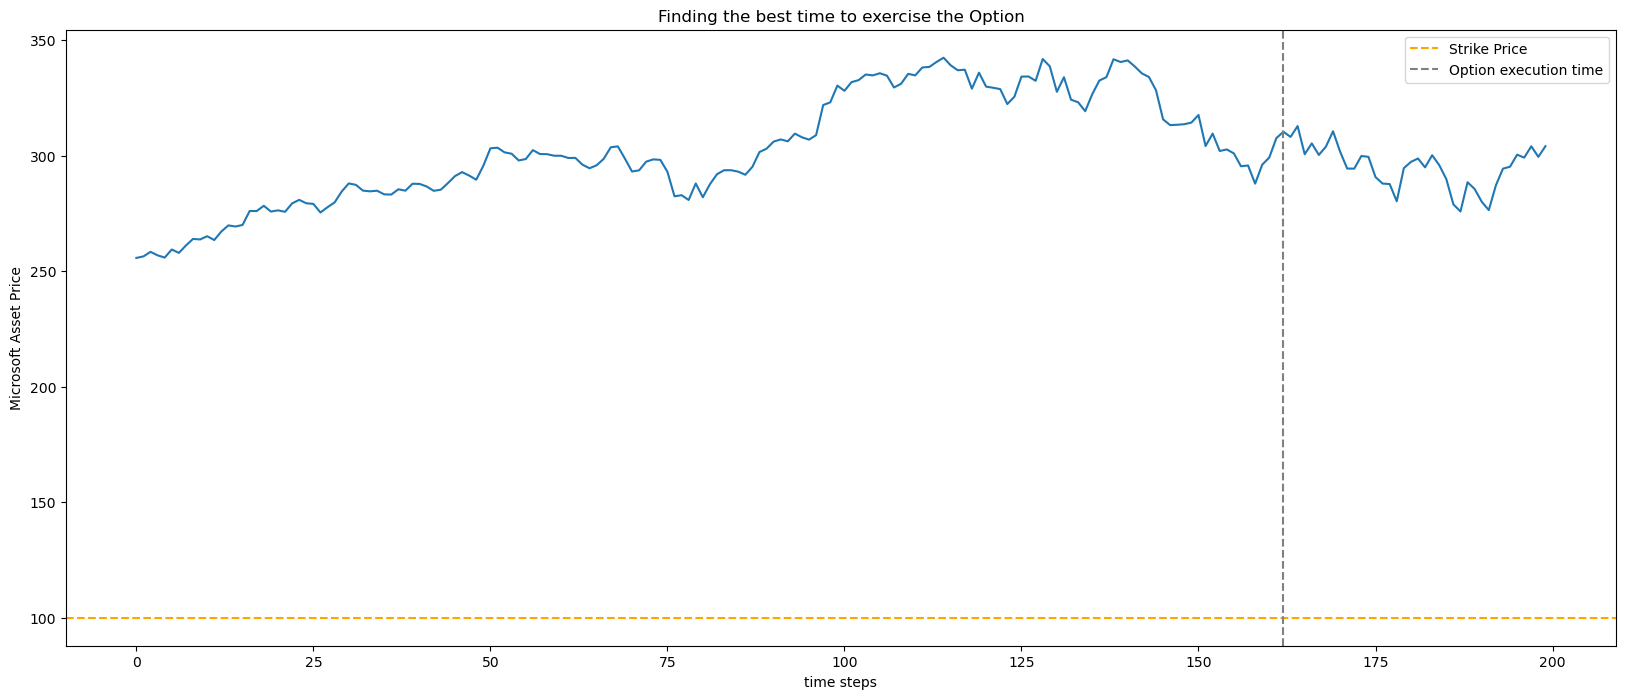

In [74]:
fig=plt.figure(figsize=(20,8))
plt.plot(test_data)
plt.axhline(y = K, color = 'orange', linestyle = '--', label="Strike Price") 
plt.axvline(x = t, color = 'gray', linestyle = '--', label='Option execution time') 
plt.xlabel('time steps')  
plt.ylabel('Microsoft Asset Price')  
# displaying the title 
plt.title("Finding the best time to exercise the Option") 
plt.legend()
plt.show();

In [ ]:
trainer.train(data.flatten(), T, steps, episodes, batch_size)

C:\Users\EDGAR MUYALE DAVIES\AppData\Local\Temp\ipykernel_12388\2860154610.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch = np.array(random.sample(self.memory, batch_size))


# EXPERIMENT : HESTON MODEL

In [77]:
def test(data, T, steps, agent):
    S = np.array(data)
    S, vols = bates_model.simulate(S, T, steps)
    rewards = []
    for t in range(1, steps):
        state = np.array([S[:, t], vols[:, t]]).T
        action = agent.get_action(state)
        reward = np.sum(np.maximum(K - S[:, t], 0) * action)
        rewards.append(reward)
    plt.plot(rewards)
    plt.xlabel('Time Step')
    plt.ylabel('Reward')
    plt.title('Option Exercise Rewards')
    plt.show()

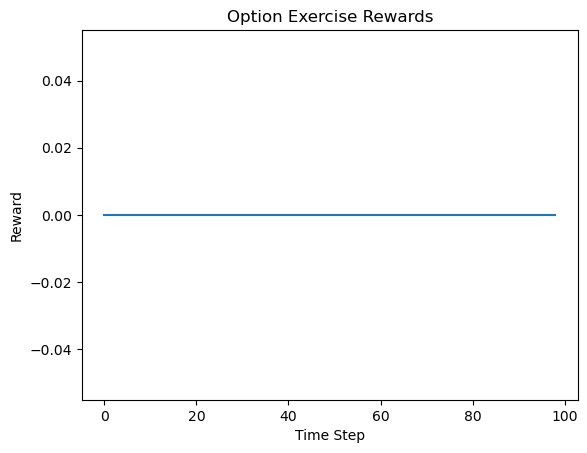

In [80]:
test(data.flatten(),T=T,steps=100,agent=agent)

In [ ]:
def test(data, T, steps, agent):
    S = np.array(data)
    S, vols = bates_model.simulate(S, T, steps)
    rewards = []
    for t in range(1, steps):
        state = np.array([S[:, t], vols[:, t]]).T
        action = agent.get_action(state)
        reward = np.sum(np.maximum(K - S[:, t], 0) * action)
        rewards.append(reward)
    plt.plot(rewards)
    plt.xlabel('Time Step')
    plt.ylabel('Reward')
    plt.title('Option Exercise Rewards')
    plt.show()

# Example usage
r = 0.05
kappa = 2.0
theta = 0.04
v0 = 0.04
rho = -0.7
sigma = 0.1
K = 100
input_size = 2
epsilon = 0.1
gamma = 0.99
lr = 0.001
batch_size = 32
episodes = 1000
steps = 100
T = 1
data 

